# Plot parcel damage v.s. return period

<div id="toc"></div>

In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter

In [2]:
%matplotlib inline

In [3]:
os.getcwd()

'I:\\RESEARCH\\_PAPERS\\MANUSCRIPT\\FIG\\zCase_ForPaper\\PclDmgTr'

## Read data

In [4]:
CC = pd.read_csv('CC/Cur2000DmgTr.csv',header=None)
GP = pd.read_csv('GP/Cur2000DmgTr.csv',header=None)
PC = pd.read_csv('PC/Cur2000DmgTr.csv',header=None)

In [5]:
CC.head()

,0,1,2,3
0,10.0,NaN,NaN,NaN
1,20.0,NaN,NaN,NaN
2,25.0,NaN,NaN,NaN
3,30.0,NaN,NaN,NaN
4,40.0,2822729.9,1213.835,26138616.0


## Plot Loss

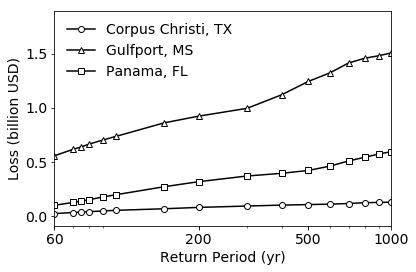

In [6]:
font = {'size':14}
matplotlib.rc('font', **font)

plt.semilogx(CC[0],CC[1]/1000000000,'-ko',
             GP[0],GP[1]/1000000000,'-k^',
             PC[0],PC[1]/1000000000,'-ks',markerfacecolor='white')

plt.xlim([60,1000])
plt.xticks([60,200,500,1000], ['60','200','500','1000'])
plt.xlabel('Return Period (yr)')
plt.ylabel('Loss (billion USD)')
plt.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], frameon=False)
plt.tight_layout()
# plt.savefig('Loss.png', dpi=300)

## Plot Population

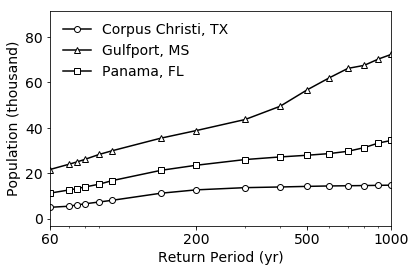

In [7]:
plt.semilogx(CC[0],CC[2]/1000,'-ko',
             GP[0],GP[2]/1000,'-k^',
             PC[0],PC[2]/1000,'-ks',markerfacecolor='white')
plt.xlim([60,1000])
plt.xticks([60,200,500,1000], ['60','200','500','1000'])
plt.xlabel('Return Period (yr)')
plt.ylabel('Population (thousand)')
plt.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], frameon=False)
plt.tight_layout()
# plt.savefig('Pop.png', dpi=300)

## Plot Area

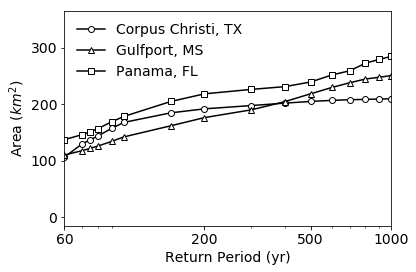

In [8]:
plt.semilogx(CC[0],CC[3]/1000000,'-ko',
             GP[0],GP[3]/1000000,'-k^',
             PC[0],PC[3]/1000000,'-ks',markerfacecolor='white')
plt.xlim([60,1000])
plt.xticks([60,200,500,1000], ['60','200','500','1000'])
plt.xlabel('Return Period (yr)')
plt.ylabel(r'Area ($km^2$)')
plt.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], frameon=False)
plt.tight_layout()
# plt.savefig('Area.png', dpi=300)

# Read shapefile/dbf data

In [9]:
from simpledbf import Dbf5

In [10]:
dbf_CC = Dbf5('shp/CcPclExpDmg02.dbf')
df_CC = dbf_CC.to_dataframe()

In [11]:
df_CC.head()

,PclID,HZBLKID,CNSBLKID,BGID,SRFID,ELV,IMPVAL,PCLPOP,AREA,CUR2000,...,IMP4,IMP5,IMP6,IMP7,Inc21,Inc31,Inc41,Inc51,Inc61,Inc71
0,1,6521,9570,30,110,6.13,0.0,2.0,1330.0,0.000,...,0,0,0,0,0.000,0.000,0.00,0.000,0.000,0.000
1,2,6521,9570,30,110,6.04,57719.0,2.0,1306.0,0.009,...,57719,57719,57719,57719,0.021,0.033,0.06,0.091,0.394,2.466
2,3,6521,9570,30,110,5.87,0.0,1.0,650.0,0.000,...,0,0,0,0,0.000,0.000,0.00,0.000,0.000,0.000
3,4,6521,9570,30,110,5.77,0.0,1.0,651.0,0.000,...,0,0,0,0,0.000,0.000,0.00,0.000,0.000,0.000
4,5,6522,8779,30,109,6.20,0.0,6.0,2926.0,0.000,...,0,0,0,0,0.000,0.000,0.00,0.000,0.000,0.000


In [12]:
dbf_GP = Dbf5('shp/GpPclExpDmg02.dbf')
df_GP = dbf_GP.to_dataframe()

In [13]:
df_GP.head()

,PclID,HZBLKID,CNSBLKID,BGID,SRFID,ELV,IMPVAL,PCLPOP,AREA,CUR2000,...,IMP4,IMP5,IMP6,IMP7,Inc21,Inc31,Inc41,Inc51,Inc61,Inc71
0,1,716,2539,101,122,16.392,9.0,1.49,1049.74,0.0,...,9,9,9,9,0.0,0.0,0.0,0.0,0.0,0.0
1,2,4341,3387,44,122,7.504,0.0,0.18,612.89,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,4073,6237,22,35,45.758,8488.0,21.76,2478812.20,0.0,...,8488,8488,8488,8488,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4073,6237,22,35,68.761,0.0,0.14,15596.00,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,4073,6237,22,35,71.181,24255.0,0.13,14644.57,0.0,...,24255,24255,24255,24255,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
dbf_PC = Dbf5('shp/PclExpDmg00.dbf')
df_PC = dbf_PC.to_dataframe()

In [15]:
df_PC.head()

,PclId,HZBLKID,CNSBLKID,BGID,SRFID,ELV,IMPVAL,PCLPOP,AREA,CUR2000,...,B180LOW,A1B80MID,A1FI80HIGH,IMP1,IMP2,IMP3,IMP4,IMP5,IMP6,IMP7
0,1,1464,5257,80,0,63.60,96631,1.662,41160.659,0.0,...,0.0,0.0,0.0,96631,96631,96631,96631,96631,96631,96631
1,2,1464,5257,80,0,62.65,7286,1.432,35462.713,0.0,...,0.0,0.0,0.0,7286,7286,7286,7286,7286,7286,7286
2,3,1464,5257,80,0,62.83,24987,1.599,39592.517,0.0,...,0.0,0.0,0.0,24987,24987,24987,24987,24987,24987,24987
3,4,1464,5257,80,0,63.28,0,0.857,21215.875,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,5,1464,5257,80,0,63.62,0,0.740,18314.453,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [16]:
ImpTotCC = np.sum(df_CC.IMPVAL)
ImpTotCC

12635600764.0

In [17]:
# ImpTotCC = np.sum(df_CC.IMPVAL[df_CC.CUR2000>0])
ImpTotCC = np.sum(df_CC.IMPVAL)
ImpTotCC

12635600764.0

In [18]:
ImpTotGP = np.sum(df_GP.IMPVAL)
ImpTotGP

7397201051.0

In [19]:
ImpTotPC = np.sum(df_PC.IMPVAL)
ImpTotPC

757724588

In [20]:
TotD = ImpTotCC + ImpTotGP + ImpTotPC

In [21]:
TotP = np.sum(df_CC.PCLPOP) + np.sum(df_CC.PCLPOP) + np.sum(df_CC.PCLPOP)

In [22]:
TotA = np.sum(df_CC.AREA) + np.sum(df_CC.AREA) + np.sum(df_CC.AREA)

## Plot parcel damage in percentage

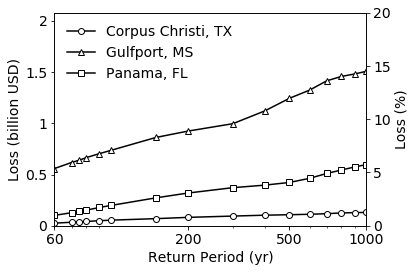

In [23]:
font = {'size':14}
matplotlib.rc('font', **font)

fig, ax1 = plt.subplots()
plt.semilogx(CC[0],CC[1]/1000000000,'-ko',
             GP[0],GP[1]/1000000000,'-k^',
             PC[0],PC[1]/1000000000,'-ks',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(CC[0],CC[1]/TotD*100, alpha=0)

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_xlabel('Return Period (yr)')

ax1.set_ylabel('Loss (billion USD)')
ax2.set_ylabel('Loss (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_ylim([0,TotD/1000000000*0.1])
ax2.set_ylim([0,10])

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

ax1.set_yticks([0,0.5,1,1.5,2])
ax1.set_yticklabels(['0','0.5','1','1.5','2'])

ax2.set_yticks([0,5,10,15,20])
ax2.set_yticklabels(['0','5','10','15','20'])

ax1.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig('LOSSpct.png', dpi=300)

## Plot Population in percentage

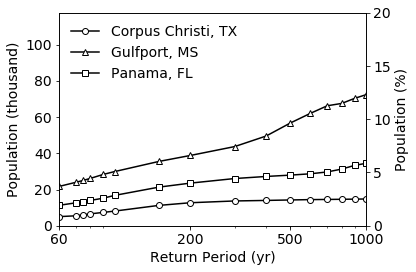

In [24]:
fig, ax1 = plt.subplots()
plt.semilogx(CC[0],CC[2]/1000,'-ko',
             GP[0],GP[2]/1000,'-k^',
             PC[0],PC[2]/1000,'-ks',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(CC[0],CC[1]/TotD*100, alpha=0)

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_xlabel('Return Period (yr)')

ax1.set_ylabel('Population (thousand)')
ax2.set_ylabel('Population (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_ylim([0,TotP/1000*0.1])
ax2.set_ylim([0,10])

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

# ax1.set_yticks([0,0.5,1,1.5,2])
# ax1.set_yticklabels(['0','0.5','1','1.5','2'])

ax2.set_yticks([0,5,10,15,20])
ax2.set_yticklabels(['0','5','10','15','20'])

ax1.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig('POPpct.png', dpi=300)

## Plot Area in percentage

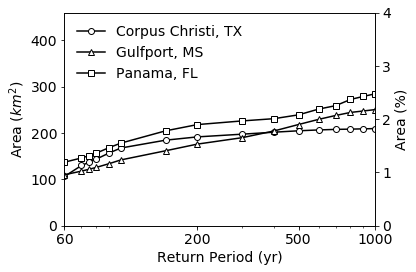

In [25]:
fig, ax1 = plt.subplots()
plt.semilogx(CC[0],CC[3]/1000000,'-ko',
             GP[0],GP[3]/1000000,'-k^',
             PC[0],PC[3]/1000000,'-ks',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(CC[0],CC[1]/TotA*100, alpha=0)

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_xlabel('Return Period (yr)')

ax1.set_ylabel('Area ($km^2$)')
ax2.set_ylabel('Area (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_ylim([0,TotA/1000000*0.04])
ax2.set_ylim([0,4])

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

# ax1.set_yticks([0,0.5,1,1.5,2])
# ax1.set_yticklabels(['0','0.5','1','1.5','2'])

ax2.set_yticks([0,1,2,3,4])
ax2.set_yticklabels(['0','1','2','3','4'])

ax1.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig('AREApct.png', dpi=300)

# Below is for backup

## Plot parcel damage in percentage

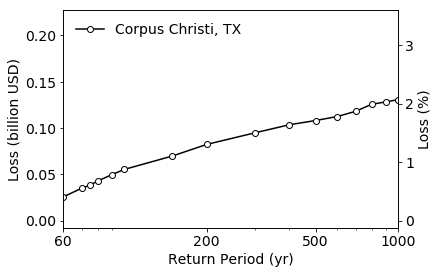

In [26]:
fig, ax1 = plt.subplots()
ax1.semilogx(CC[0],CC[1]/1000000000,'-ko',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(CC[0],CC[1]/ImpTotCC*100*2, alpha=0)

ax1.set_ylabel('Loss (billion USD)')
ax2.set_ylabel('Loss (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_xlabel('Return Period (yr)')

ax1.legend(['Corpus Christi, TX'], loc='upper left', frameon=False)

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

# plt.savefig('LossCC.png', dpi=300)

# ax1.set_ylabel('Loss (billion USD)')
# legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'])

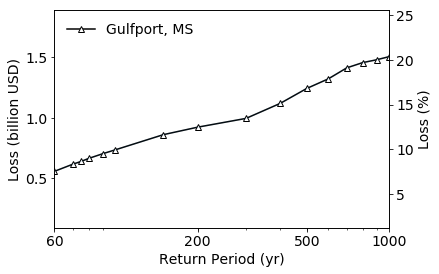

In [27]:
fig, ax1 = plt.subplots()
ax1.semilogx(GP[0],GP[1]/1000000000,'-k^',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(GP[0],GP[1]/ImpTotGP*100, alpha=0.1)

ax1.set_ylabel('Loss (billion USD)')
ax2.set_ylabel('Loss (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_xlabel('Return Period (yr)')

ax1.legend(['Gulfport, MS'], loc='upper left', frameon=False)

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

# plt.savefig('LossGP.png', dpi=300)

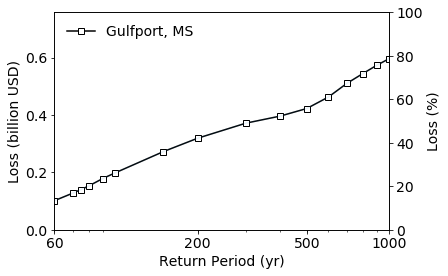

In [28]:
fig, ax1 = plt.subplots()
ax1.semilogx(PC[0],PC[1]/1000000000,'-ks',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(PC[0],PC[1]/ImpTotPC*100, alpha=0.1)

ax1.set_ylabel('Loss (billion USD)')
ax2.set_ylabel('Loss (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_ylim([0,ImpTotPC/1000000000])
ax2.set_ylim([0,100])

ax1.set_xlabel('Return Period (yr)')

ax1.legend(['Gulfport, MS'], loc='upper left', frameon=False)

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

# plt.savefig('LossPC.png', dpi=300)